### Author: Nicholas Ondo

### Purpose: Metis Stats Problem Solutions Code

License: MIT License: https://opensource.org/licenses/MIT

# Checking Basic Functionality of the thinkstats2 module

In [1]:
import thinkstats2
import numpy as np
import pandas as pd
import thinkplot

from scipy.stats import norm

In [2]:
import nsfg

df = nsfg.ReadFemPreg()

df.shape

(13593, 244)

In [3]:
df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [4]:
# Get a list of all of the cols for reference

#with open("__full_cols.txt", "w") as f:
#    for col in df.columns:
#        f.write(f"{col} \n")

---

# Q1: ThinkStats2 Problem 2.4

In [5]:
def cohen_d(sample1, sample2):
    diff = sample1.mean() - sample2.mean()
    
    var1, var2 = sample1.var(), sample2.var()
    n1, n2 = len(sample1), len(sample2)
    tot_var = (n1*var1 + n2*var2) / (n1 + n2)
    
    return diff / np.sqrt(tot_var)

## Run a few unit tests on the Cohen's d
# test1 = pd.DataFrame({"weight": np.random.normal(5, 1, 10000)})
# test2 = pd.DataFrame({"weight": np.random.normal(-5, 1, 10000)})
#
# cohen_d(test1, test2) # should be about 10 +/- .2

### Answer to Q1:

In [6]:
# Take live births
df2 = df[df.outcome == 1]

first_weight = df2[df2.birthord == 1].totalwgt_lb
later_weight = df2[df2.birthord > 1].totalwgt_lb

cohen_d(first_weight, later_weight)

-0.088672927072602

---

# Q2: ThinkStats2 Problem 3.1

In [7]:
# Grab the respondent variables
df3 = nsfg.ReadFemResp()

# Get columns for reference: OVER A THOUSAND!
# with open("__full_respondent_cols.txt", "w") as f:
#    for col in df3.columns:
#        f.write(f"{col}\n")

In [8]:
def get_pmfs(df, val="numkdhh"):
    """Given a DataFrame and a column name, returns the PMF and biased PMF."""
    
    pmf = thinkstats2.Pmf(df[val], label=val)
    biased_pmf = pmf.Copy(label=f"{val}_biased")

    for x, _ in pmf.Items():
        biased_pmf.Mult(x, x)
    
    biased_pmf.Normalize()
    
    return pmf, biased_pmf

In [9]:
# Read in my unbiased and biased pmf's for then number of children per household

pmf_fam, pmf_bias_fam = get_pmfs(df3)

### Answers to Q2:

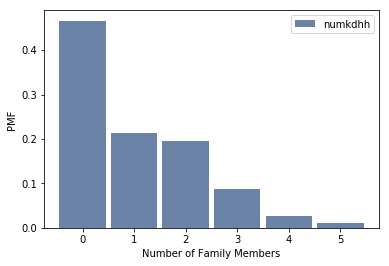

In [10]:
thinkplot.Hist(pmf_fam)
thinkplot.Config(xlabel='Number of Family Members', ylabel='PMF')

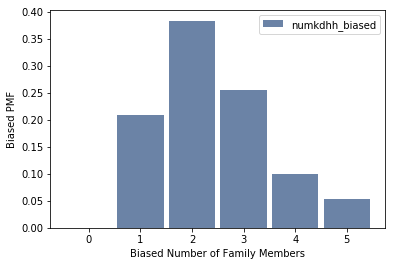

In [11]:
thinkplot.Hist(pmf_bias_fam)
thinkplot.Config(xlabel='Biased Number of Family Members', ylabel='Biased PMF')

In [12]:
print("The unbiased mean is ", pmf_fam.Mean())

The unbiased mean is  1.024205155043831


In [13]:
print("The biased mean is ", pmf_bias_fam.Mean())

The biased mean is  2.403679100664282


---
# Q3: ThinkStats2 Problem 4.2

In [14]:
unif_data = pd.Series(np.random.random(size=1000))

print("Number data: ", len(unif_data))

unif_data.head()

Number data:  1000


0    0.919313
1    0.239228
2    0.765541
3    0.793434
4    0.819763
dtype: float64

In [15]:
width = .0005 # Have 1000 samples, need a scale of ~1/2000 by Nyquist

unif_pmf = thinkstats2.Pmf(unif_data, label="Uniform(0,1)")
unif_cdf = thinkstats2.Cdf(unif_data, label="Uniform(0,1) CDF")

### Answer to Q3

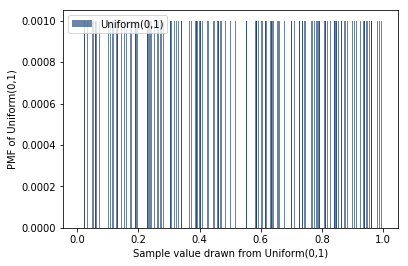

In [16]:
# Plot PMF
thinkplot.Hist(unif_pmf, width=width)
thinkplot.Config(xlabel="Sample value drawn from Uniform(0,1)",
                 ylabel="PMF of Uniform(0,1)")

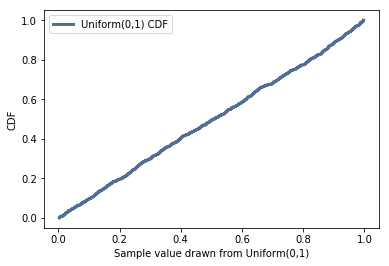

In [17]:
# Plot the CDF
thinkplot.Cdf(unif_cdf)
thinkplot.Config(xlabel="Sample value drawn from Uniform(0,1)", ylabel="CDF", loc="upper left")

Yes, I would say that it is quite linear.  We could perform a linear regression analysis to see and quantify how close to a "y = x" this is, but by sight it has the right behavior.

---
# Q4: ThinkStats2 5.1

"In the BRFSS (see Section 5.4), the distribution of heights is
roughly normal with parameters μ = 178 cm and σ = 7.7 cm for men, and
μ = 163 cm and σ = 7.3 cm for women. \[...\] In order to join Blue Man Group, you have to be male between 5’10” and
6’1” (see http://bluemancasting.com). What percentage of the U.S. male
population is in this range?"

### Answer to Q4

In [18]:
# Conversions to feet:
cm2in = 0.393701
in2ft = 1.0 / 12

# Normal distribution values:
μ_men = 178 * cm2in * in2ft
σ_men = 7.7 * cm2in * in2ft

In [19]:
# Make CDF values:
cdf_short, cdf_tall = norm.cdf(
    [5 + 10/12, 6 + 1/12],
    μ_men, σ_men)

print(f"{(cdf_tall - cdf_short)*100 :.4}% of men can apply to the Blue Man Group.")

34.27% of men can apply to the Blue Man Group.


---
# Question 5: Bayes Theorem

Bayes' Theorem is an important tool in understanding what we really know, given evidence of other information we have, in a quantitative way.  It helps incorporate conditional probabilities into our conclusions.

Elvis Presley had a twin brother who died at birth.  What is the probability that Elvis was an identical twin? Assume we observe the following probabilities in the population: fraternal twin is 1/125 and identical twin is 1/300.  

In [20]:
prob_being_twin_male = 1/125*1/4 + 1/300*1/2
prob_being_idtwin_male = 1/300*1/2

prob_id = prob_being_idtwin_male / prob_being_twin_male

print(f"""
Elvis has a {prob_id*100 :.4}% chance of being an identical twin,
given it is already known that he is a twin.""")


Elvis has a 45.45% chance of being an identical twin,
given it is already known that he is a twin.



N.B. Here I have used Bayes theorem: $\text{P}(A \text{ given } B) = \frac{\text{P}(A \text{ and } B)}{\text{P}(B)}$, where $A =$ "Person is an identical twin" and $B =$ "Person is a twin.", and we are after P("Elvis is an identical twin", given "He is a twin").  Note that P("is an identical twin" and "is a twin") = P("is an identical twin").

---
# Q6: 
How do frequentist and Bayesian statistics compare?

### Answer to Q6:

Frequentist statistics are centered around the idea of the frequency with which a given outcome will happen among the set of existing possible outcomes, and tends to use MLE estimators for quantities.  Bayesian statistics are centered around the idea of updating the probability of an outcome given an old estimate (the prior) and the existence of new data relevant to the underlying distribution of the outcomes.  They are two distinct, parallel ways of viewing statistical inference.

---
# N.B. Begin Optional Questions

---

# Question 6.1